MODELAGEM DE DISPERSÃO \
Neste notebook vamos implementar um modelo de dispersão gaussiano.

In [22]:
# Criando uma função do modelo gaussiano
import numpy as np
def modeloGaussiano(qs,sigmaY,sigmaZ,u,y,z,H):
    termo1 = qs/(2*np.pi*sigmaY*sigmaZ*u)
    termo2 = np.exp((-y**2)/(2*sigmaY**2))
    termo3 = np.exp((-(z-H)**2)/(2*sigmaZ**2)) + np.exp((-(z+H)**2)/(2*sigmaZ**2))
    conc = termo1*termo2*termo3
    conc = conc*10**6
    return conc

In [21]:
# Criando função da estimativa da dispersão lateral e vertical da pluma
def sigmaXY(x,classe,urbOrRural):
    if urbOrRural=='urbano':
        if (classe=='A') or (classe=='B'):
            sigmaY = 0.32*x*(1+0.0004*x)**(-0.5)
            sigmaZ = 0.24*x*(1+0.001*x)**(0.5)
        else:
            print('Classe de estabilidade errada')
    if urbOrRural=='rural':
        if (classe=='A') :
            sigmaY = 0.22*x*(1+0.0001*x)**(-0.5)
            sigmaZ = 0.20*x
        else:
            print('Classe de estabilidade errada. Fique ligado')
    return sigmaY,sigmaZ

In [20]:
# Utilizando a função do modelo gaussiano
qs = 100  # g/s
sigmaY = 10  # m
sigmaZ = 15  # m
u = 10  # m/s
y = 0  # estimando na direção do vento
z = 1.5  # altura do nariz
H = 50  # m

# Chamando a função do modelo gaussiano
conc = modeloGaussiano(qs, sigmaY, sigmaZ, u, y, z, H)

print("A concentração estimada é = " + str(conc) + ' µg/m³')



A concentração estimada é = 5.69606721961475e-05 µg/m³


C:\Users\PC\AppData\Local\Temp\ipykernel_6120\3691735797.py:25: UserWarning: Log scale: values of z <= 0 have been masked
  cf = ax[0].contourf(xx, yy, conc, cmap='viridis', norm=LogNorm())


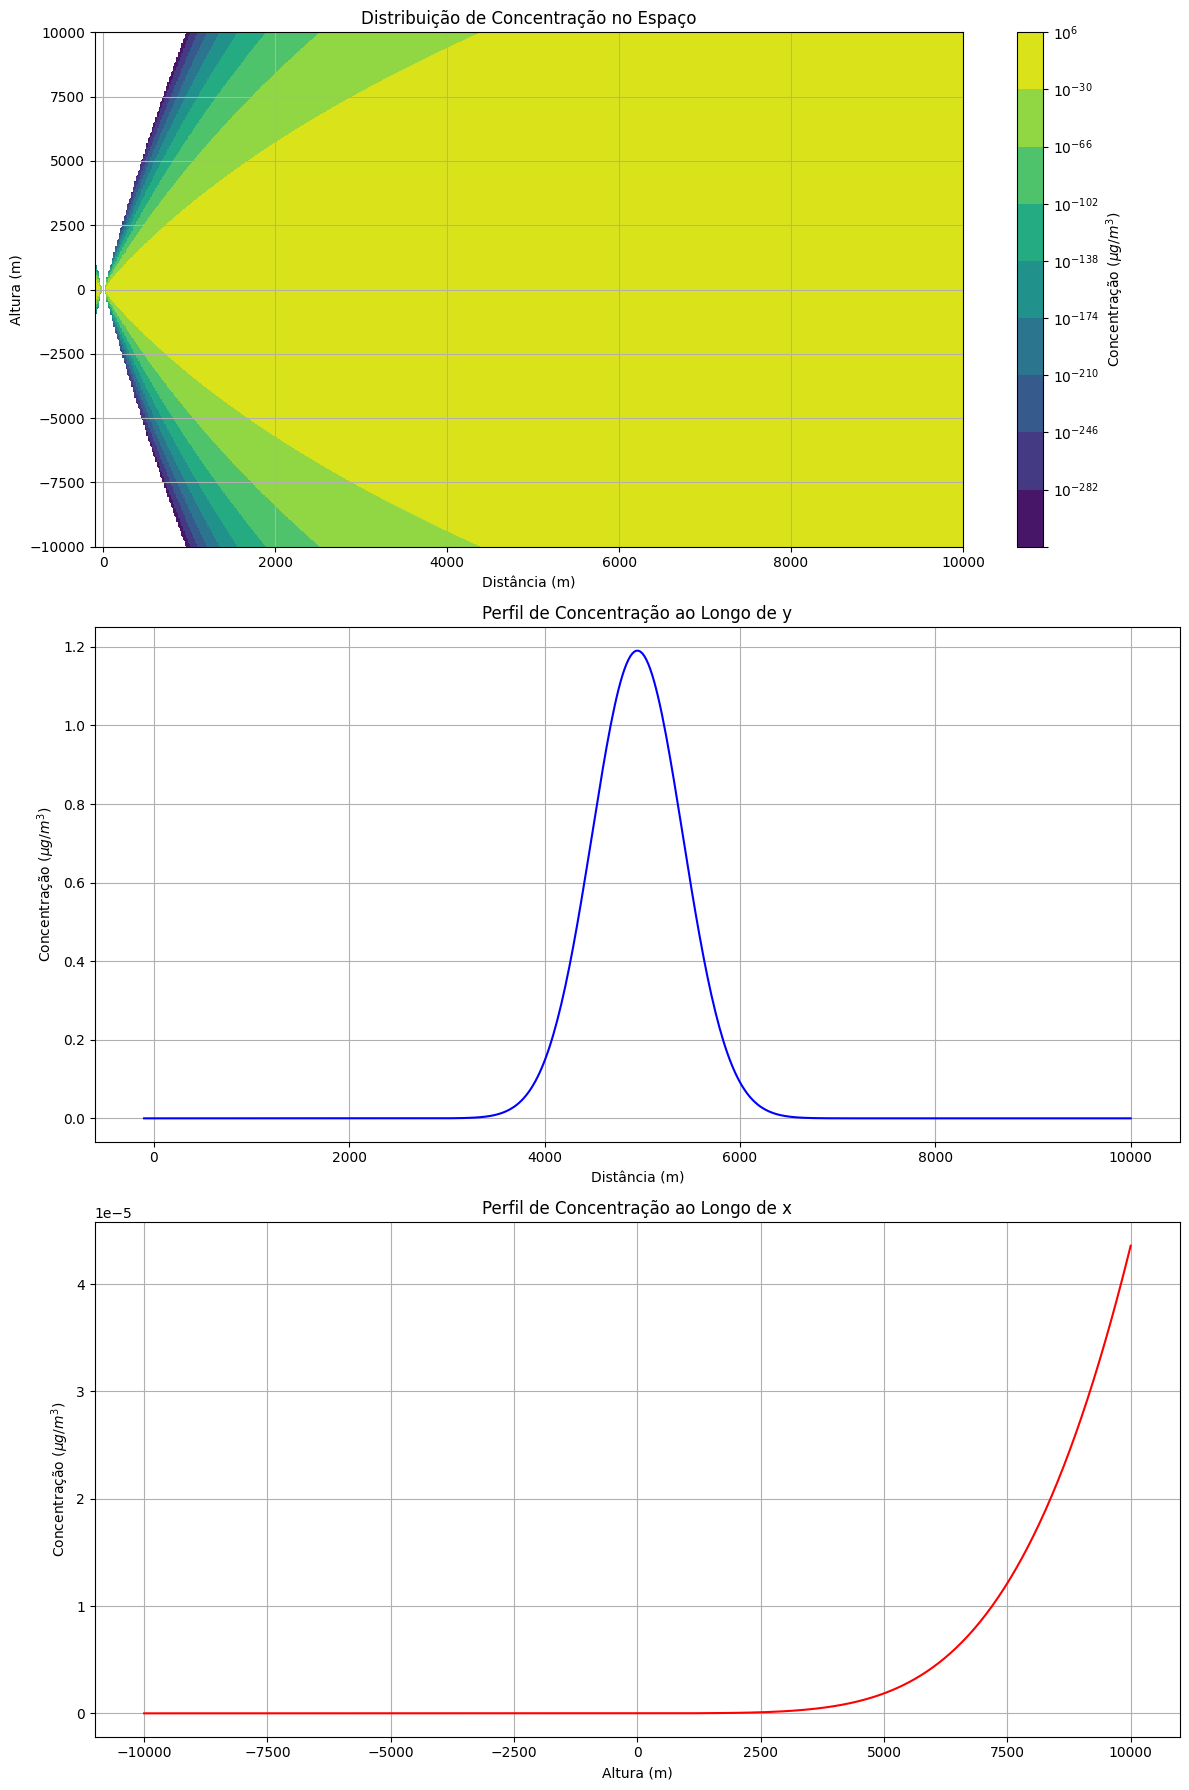

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

# Criando domínio de modelagem 
x = np.linspace(-100, 10000, 500)
y = np.linspace(-10000, 10000, 500)
xx, yy = np.meshgrid(x, y)

# Adotando inputs
classe = 'B'
urbOrRural = 'urbano' 
H = 150 # m

# Estimando o coeficiente de dispersão lateral e vertical
sigmaY, sigmaZ = sigmaXY(xx, classe, urbOrRural)

# Utilizando a matriz de yy como input na função do modelo gaussiano
conc = modeloGaussiano(qs, sigmaY, sigmaZ, u, yy, z, H)

# Visualização dos resultados no espaço
fig, ax = plt.subplots(3, 1, figsize=(12, 18))

# Plotagem do contorno da Distribuição de Concentração no Espaço
cf = ax[0].contourf(xx, yy, conc, cmap='viridis', norm=LogNorm())
cbar = fig.colorbar(cf, ax=ax[0], orientation='vertical')
cbar.set_label('Concentração ($\mu g/m^3$)')
ax[0].set_title('Distribuição de Concentração no Espaço')
ax[0].set_xlabel('Distância (m)')
ax[0].set_ylabel('Altura (m)')
ax[0].grid(True)

# Corte em y - sobre o eixo x
ax[1].plot(x, conc[:, 250], color='blue')
ax[1].set_title('Perfil de Concentração ao Longo de y')
ax[1].set_xlabel('Distância (m)')
ax[1].set_ylabel('Concentração ($\mu g/m^3$)')
ax[1].grid(True)

# Corte em x - sobre o eixo y 
ax[2].plot(y, conc[100, :], color='red')
ax[2].set_title('Perfil de Concentração ao Longo de x')
ax[2].set_xlabel('Altura (m)')
ax[2].set_ylabel('Concentração ($\mu g/m^3$)')
ax[2].grid(True)

plt.tight_layout()
plt.show()
